In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df=pd.read_excel("C:/Users/STARHIVE/Downloads/data.xlsx")
df

,Unnamed: 0,Population,Unnamed: 2,Average annual population growth %,Population age composition,Unnamed: 5,Unnamed: 6,Dependency ratio,Unnamed: 8,Crude death rate,Crude birth rate
0,NaN,NaN,NaN,NaN,Ages 0-14,Ages 15-64,Ages 65+,young,old,NaN,NaN
1,NaN,millions,NaN,NaN,%,%,%,% of working-age population,% of working-age population,"per 1,000 people","per 1,000 people"
2,NaN,2000,2023.0,2000-2023,2023,2023,2023,2023,2023,2022,2022
3,Afghanistan,19.5,42.2,3.4,43,55,2,78,4,7,35
4,Albania,3.1,2.7,-0.5,16,67,17,24,26,11,10
...,...,...,...,...,...,...,...,...,...,...,...
224,Sub-Saharan Africa,671.2,1241.9,2.7,42,55,3,75,6,9,34
225,Low income,382.6,723.0,2.8,41,55,3,75,6,8,34
226,Lower middle income,2114.9,3059.6,1.6,30,64,6,46,9,8,21
227,Upper middle income,2365.6,2810.6,0.7,20,68,12,30,17,8,11


In [5]:
df.shape

(229, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          226 non-null    object 
 1   Population                          228 non-null    object 
 2   Unnamed: 2                          227 non-null    float64
 3   Average annual population growth %  227 non-null    object 
 4   Population age composition          229 non-null    object 
 5   Unnamed: 5                          229 non-null    object 
 6   Unnamed: 6                          229 non-null    object 
 7   Dependency ratio                    229 non-null    object 
 8   Unnamed: 8                          229 non-null    object 
 9   Crude death rate                    228 non-null    object 
 10  Crude birth rate                    228 non-null    object 
dtypes: float64(1), object(10)
memory usage: 19.8+

In [7]:
print(df['Population age composition'].unique())

# Print unique values in 'Column6'
print(df['Unnamed: 5'].unique())

# Print unique values in 'Column7'
print(df['Unnamed: 6'].unique())

['Ages 0-14' '%' 2023 43 16 30 27 12 45 18 23 20 14 26 17 42 22 15 32 29
 48 47 21 38 41 19 25 33 39 34 28 36 37 24 40 11 13 49 10 31 44]
['Ages 15-64' '%' 2023 55 67 63 65 72 53 71 66 69 76 68 64 70 54 52 75 50
 51 58 57 56 62 59 61 60 73 74 49 83 78]
['Ages 65+' '%' 2023 2 17 7 8 16 3 11 12 14 20 9 4 6 18 5 21 19 10 22 13
 23 15 24 30 36]


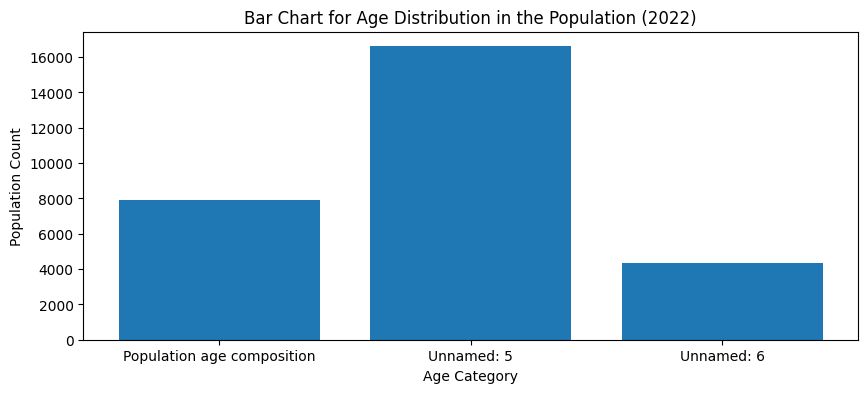

In [8]:
# Convert columns to numeric, coercing errors
df['Population age composition'] = pd.to_numeric(df['Population age composition'], errors='coerce')
df['Unnamed: 5'] = pd.to_numeric(df['Unnamed: 5'], errors='coerce')
df['Unnamed: 6'] = pd.to_numeric(df['Unnamed: 6'], errors='coerce')

# Replace missing age values with the median age of the population
median_age_column5 = df['Population age composition'].median()
median_age_column6 = df['Unnamed: 5'].median()
median_age_column7 = df['Unnamed: 6'].median()

df['Population age composition'] = df['Population age composition'].fillna(median_age_column5)
df['Unnamed: 5'] = df['Unnamed: 5'].fillna(median_age_column6)
df['Unnamed: 6'] = df['Unnamed: 6'].fillna(median_age_column7)

# Define age categories
age_categories = ['Population age composition', 'Unnamed: 5', 'Unnamed: 6']

# Create a new DataFrame with columns for each age category
df_stacked = df[['Population age composition', 'Unnamed: 5', 'Unnamed: 6']].copy()
df_stacked.columns = age_categories

# Calculate the sum of each age category
total_population = df_stacked.sum()

# Create a bar chart for age distribution
plt.figure(figsize=(10, 4))
plt.bar(age_categories, total_population)
plt.xlabel('Age Category')
plt.ylabel('Population Count')
plt.title('Bar Chart for Age Distribution in the Population (2022)')
plt.show()


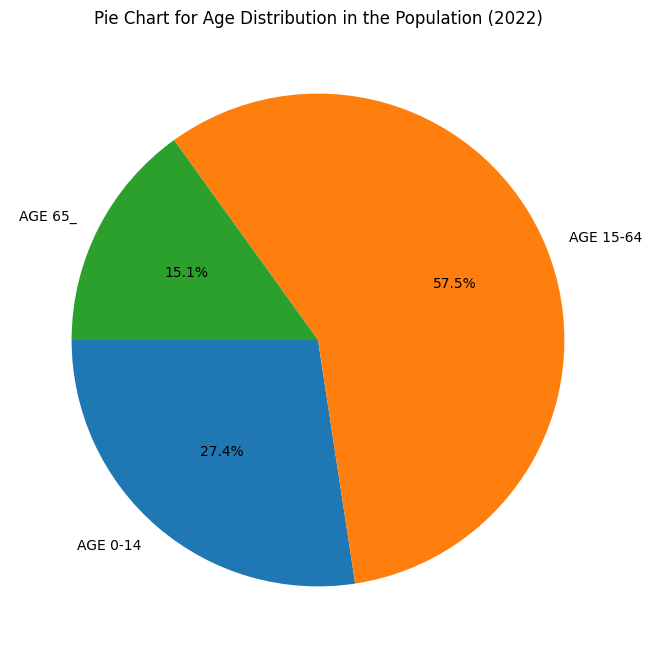

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert columns to numeric, coercing errors
df['AGE 0-14'] = pd.to_numeric(df['Population age composition'], errors='coerce')
df['Unnamed: 5'] = pd.to_numeric(df['Unnamed: 5'], errors='coerce')
df['Unnamed: 6'] = pd.to_numeric(df['Unnamed: 6'], errors='coerce')

# Replace missing values with the median age of the population
median_age_column5 = df['AGE 0-14'].median()
median_age_column6 = df['Unnamed: 5'].median()
median_age_column7 = df['Unnamed: 6'].median()

df['AGE 0-14'] = df['AGE 0-14'].fillna(median_age_column5)
df['Unnamed: 5'] = df['Unnamed: 5'].fillna(median_age_column6)
df['Unnamed: 6'] = df['Unnamed: 6'].fillna(median_age_column7)

# Define age categories
age_categories = ['AGE 0-14', 'AGE 15-64', 'AGE 65_']

# Create a new DataFrame with columns for each age category
df_stacked = df[['AGE 0-14', 'Unnamed: 5', 'Unnamed: 6']].copy()
df_stacked.columns = age_categories

# Calculate the sum of each age category
total_population = df_stacked.sum()

# Create a pie chart for age distribution
plt.figure(figsize=(8, 8))
plt.pie(total_population, labels=age_categories, autopct='%1.1f%%', startangle=180)
plt.title('Pie Chart for Age Distribution in the Population (2022)')
plt.show()
